### 1. Importing Libraries and Data

In [86]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


#import datetime 
import datetime

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
clients_data = pd.read_csv("data/clientDataClean.csv",index_col=0)

In [88]:
clients_data

,first_name,last_name,email,gender,username,date_of_birth,nationality,city,travel_car,drinks_alcohol,...,favourite_food,dislike_food,personality,preferred_payment,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n
0,Örjan,Douberday,wdouberday0@google.com.br,Male,mdouberday0,1961-01-17 00:12:00,Portuguese,Setúbal,False,False,...,arroz de pato,sopa de tomate,mindful,MBWay,familiar,seafood,13:00 - 14:00,19:00 - 20:00,13.0,False
1,Céline,Milmo,lmilmo1@naver.com,Male,lmilmo1,1986-01-02 00:11:00,Portuguese,Setúbal,True,False,...,cheesecake,bitoque,mindful,Cash,after work,portuguese,13:00 - 14:00,21:00 - 22:00,15.0,False
2,Bérénice,McCaughey,jmccaughey2@blogs.com,Male,kmccaughey2,1991-01-10 00:05:00,Portuguese,Porto,True,True,...,pasta,arroz de pato,foodie,Credit Card,after work,mediterranean,12 :00 - 13:00,18 :00 - 19:00,13.0,False
3,Gaëlle,O'Hickey,gohickey3@biblegateway.com,Male,kohickey3,1974-01-21 00:10:00,Portuguese,Coimbra,False,True,...,filetes de pescada,ceviche,foodie,MBWay,after work,portuguese,13:00 - 14:00,20:00 - 21:00,26.0,False
4,Yáo,O'Sheilds,aosheilds4@pbs.org,Female,hosheilds4,1969-01-05 00:01:00,Portuguese,Leiria,False,True,...,tacos,salada de frutas,social,MBWay,homemade,meat cuisine,13:00 - 14:00,19:00 - 20:00,20.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Vérane,Rayner,mraynerro@icio.us,Male,braynerro,1977-01-06 00:04:00,Portuguese,Castelo Branco,False,False,...,bacalhau a gomes de sa,pasta,social,MBWay,homemade,mediterranean,14:00 - 15:00,19:00 - 20:00,20.0,False
997,Jú,Boyd,rboydrp@github.com,Male,sboydrp,1970-01-16 00:09:00,Portuguese,Faro,True,False,...,pimentos,croissant,comfort,Credit Card,traditional,mediterranean,12 :00 - 13:00,19:00 - 20:00,13.0,False
998,Françoise,Laudham,blaudhamrq@squarespace.com,Female,hlaudhamrq,1962-01-18 00:03:00,Portuguese,Porto,False,True,...,bacalhau à zé do pipo,filetes de pescada,comfort,MBWay,view,international,13:00 - 14:00,19:00 - 20:00,26.0,False
999,Andréa,Sinyard,csinyardrr@disqus.com,Male,fsinyardrr,1986-01-09 00:01:00,Portuguese,Lisbon,True,True,...,bacalhau a bras,lasanha,foodie,Cash,fine dining,pizzeria,12 :00 - 13:00,19:00 - 20:00,13.0,False


In [89]:
clients_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1000
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_name            1001 non-null   object 
 1   last_name             1001 non-null   object 
 2   email                 1001 non-null   object 
 3   gender                1001 non-null   object 
 4   username              1001 non-null   object 
 5   date_of_birth         1001 non-null   object 
 6   nationality           1001 non-null   object 
 7   city                  1001 non-null   object 
 8   travel_car            1001 non-null   bool   
 9   drinks_alcohol        1001 non-null   bool   
 10  dietary_restrictions  1001 non-null   object 
 11  allergies             1001 non-null   object 
 12  favourite_food        983 non-null    object 
 13  dislike_food          980 non-null    object 
 14  personality           1001 non-null   object 
 15  preferred_payment     1001

In [90]:
clients_data.isna().sum()

first_name                0
last_name                 0
email                     0
gender                    0
username                  0
date_of_birth             0
nationality               0
city                      0
travel_car                0
drinks_alcohol            0
dietary_restrictions      0
allergies                 0
favourite_food           18
dislike_food             21
personality               0
preferred_payment         0
restaurant_style          0
cuisine_type            109
lunch_hour                0
dinner_hour               0
normal_price_range        0
smoker_n                  0
dtype: int64

### 2. Visulization

#### Nationality

In [91]:
clients_data['nationality'].value_counts()

nationality
Portuguese      851
American         27
British          22
Brazillian       21
Brazilian        19
Chinese          12
Indian            9
Italian           8
Ukrainian         7
Spanish           7
Mozambican        6
Cape Verdean      5
Angolan           3
French            2
German            2
Name: count, dtype: int64

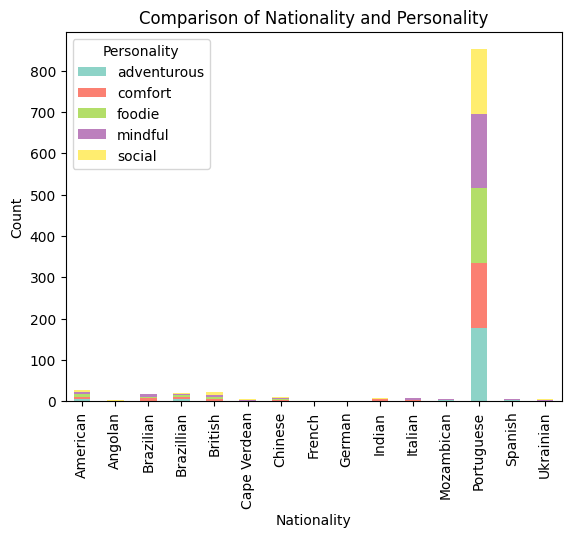

In [92]:
# Create a pivot table to count the occurrences of each combination of Nationality and Personality
pivot_table = pd.crosstab(clients_data['nationality'], clients_data['personality'])


# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='Set3')

# Customize the plot
plt.title('Comparison of Nationality and Personality')
plt.xlabel('Nationality')
plt.ylabel('Count')

# Show the plot
plt.legend(title='Personality')
plt.show()

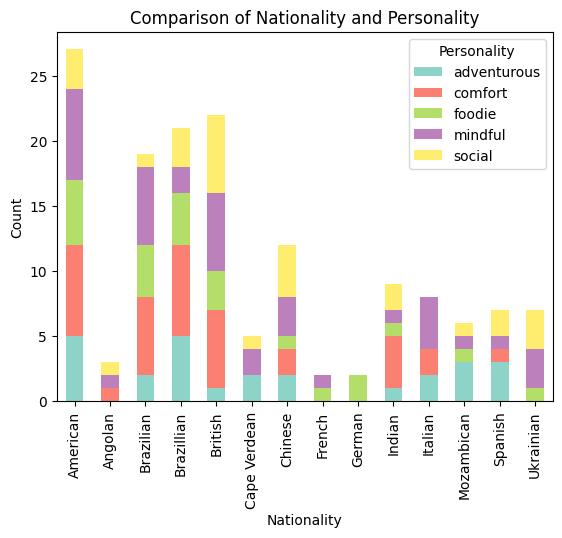

In [93]:
# Filter the data to exclude Portuguese nationality
filtered_data = clients_data[clients_data['nationality'] != 'Portuguese']

# Create a pivot table to count the occurrences of each combination of Nationality and Personality
pivot_table = pd.crosstab(filtered_data['nationality'], clients_data['personality'])

# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, colormap='Set3')

# Customize the plot
plt.title('Comparison of Nationality and Personality')
plt.xlabel('Nationality')
plt.ylabel('Count')

# Show the plot
plt.legend(title='Personality')
plt.show()

In [94]:
# 
condition= clients_data['nationality'].isin(['Angolan','Cape Verdean', 'French', 'German'])
clients_data.drop(clients_data[condition].index, inplace = True)

#### Payment

In [95]:
clients_data['preferred_payment'].value_counts()

preferred_payment
Credit Card         441
MBWay               286
Cash                219
Visa                 14
Apple Pay             8
Paypal                7
Mastercard            4
Maestro Card          4
Visa Electron         3
American Express      3
Name: count, dtype: int64

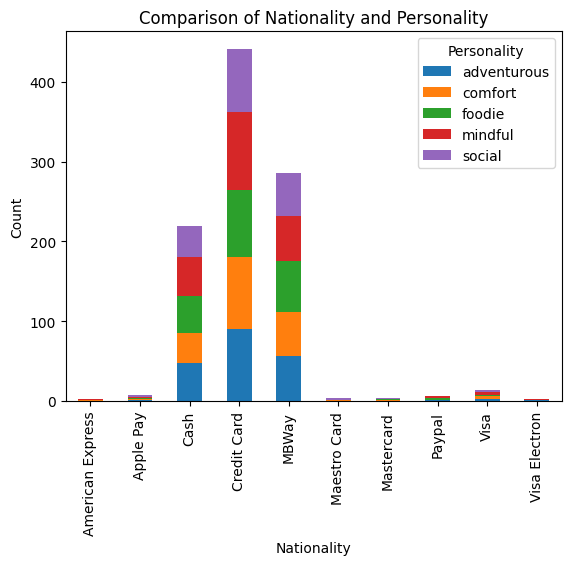

In [96]:
# Create a pivot table to count the occurrences of each combination of Nationality and Personality
pivot_table = pd.crosstab(clients_data['preferred_payment'], clients_data['personality'])


# Plot a stacked bar chart
pivot_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Comparison of Nationality and Personality')
plt.xlabel('Nationality')
plt.ylabel('Count')

# Show the plot
plt.legend(title='Personality')
plt.show()

In [97]:
#Transform 'American Express', 'Maestro Card', 'Mastercard','Visa' and 'Visa Electron' to Credit Carr
clients_data['preferred_payment'].replace(['American Express','Mastercard', 'Maestro Card', 'Visa', 'Visa Electron'],'Credit Card', inplace = True)


In [98]:
#Drop 'Apple Pay' and 'Paypal'
condition = clients_data['preferred_payment'].isin(['Apple Pay','Paypal'])
clients_data.drop(clients_data[condition].index, inplace = True)

### 2. Pre-processing and Feature Engengineering

In [99]:
# Replace 'brazillian' with 'brazilian' in the 'nationality' column
clients_data['nationality'] = clients_data['nationality'].replace('Brazillian', 'Brazilian')

In [100]:
#normal price as integer
clients_data['normal_price_range'] = clients_data['normal_price_range'].astype(int)

In [101]:
#lunch and dinner hour as integer
clients_data['lunch_hour'] = clients_data['lunch_hour'].str.extract(r'(\d{2})').astype(int)
clients_data['dinner_hour'] = clients_data['dinner_hour'].str.extract(r'(\d{2})').astype(int)

In [102]:
#alterar input nossas observações
clients_data.drop(1000, inplace=True)



#Calculating Age
current_date = datetime.date.today()

clients_data['date_of_birth'] = pd.to_datetime(clients_data['date_of_birth'], format='%Y-%m-%d %H:%M:%S')
clients_data['date_of_birth'] = clients_data['date_of_birth'].dt.date

clients_data['age'] = ((current_date - clients_data['date_of_birth'])/ pd.Timedelta(days=365)).astype(int)


In [103]:
#Encoding gender
clients_data = pd.get_dummies(clients_data, columns=['gender'], prefix='gender')
clients_data.drop('gender_Female', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['gender_Male'] = clients_data['gender_Male'].astype(int)
clients_data['gender_Other'] = clients_data['gender_Other'].astype(int)

In [104]:
# Transform 'smoker_n' into binary
clients_data['smoker_n'] = clients_data['smoker_n'].astype(int)

In [105]:
# Transform 'travel_car' into binary
clients_data['travel_car'] = clients_data['travel_car'].astype(int)

In [106]:
# Transform 'drinks_alcohol' into binary
clients_data['drinks_alcohol'] = clients_data['drinks_alcohol'].astype(int)

In [107]:
#Encoding dietary_restrictions
clients_data = pd.get_dummies(clients_data, columns=['dietary_restrictions'])
clients_data.drop('dietary_restrictions_none', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['dietary_restrictions_vegan'] = clients_data['dietary_restrictions_vegan'].astype(int)
clients_data['dietary_restrictions_vegetarian'] = clients_data['dietary_restrictions_vegetarian'].astype(int)

In [108]:
def has_allergies(allergies):
    if allergies == "none":
        return 0
    else:
        return 1

In [109]:
#Transform 'allergies' to binary (0 - No allergies, 1 - Has allergies)
clients_data['allergies'] = clients_data['allergies'].apply(has_allergies)

In [110]:
clients_data['allergies'].value_counts()

allergies
0    874
1     99
Name: count, dtype: int64

In [111]:
#Encoding gender preferred_payment
clients_data = pd.get_dummies(clients_data, columns=['preferred_payment'])
clients_data.drop('preferred_payment_Cash', axis=1, inplace=True)

# Transform boolean outputs into binary
clients_data['preferred_payment_Credit Card'] = clients_data['preferred_payment_Credit Card'].astype(int)
clients_data['preferred_payment_MBWay'] = clients_data['preferred_payment_MBWay'].astype(int)

In [114]:
from geopy.geocoders import Nominatim

# Function to get the latitude and longitude of a city
def geocode_city(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None


In [115]:
# Initialize the geolocator
geolocator = Nominatim(user_agent="city_locator")

#Apply function geocode_city
clients_data['city_latitude'], clients_data['city_longitude'] = zip(*clients_data['city'].apply(geocode_city))

#Drop feature 'city'
clients_data.drop(['city'], axis=1, inplace=True)

In [145]:
from sklearn.preprocessing import LabelEncoder


# Create LabelEncoder objects
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()

# Apply label encoding
clients_data['restaurant_style'] = label_encoder1.fit_transform(clients_data['restaurant_style'])
clients_data['cuisine_type'] = label_encoder2.fit_transform(clients_data['cuisine_type'])
clients_data['nationality'] = label_encoder3.fit_transform(clients_data['nationality'])
clients_data['personality'] = label_encoder4.fit_transform(clients_data['personality'])


### 3. Feature Selection

In [122]:
clients_data.columns

Index(['nationality', 'travel_car', 'drinks_alcohol', 'allergies',
       'personality', 'restaurant_style', 'cuisine_type', 'lunch_hour',
       'dinner_hour', 'normal_price_range', 'smoker_n', 'age', 'gender_Male',
       'gender_Other', 'dietary_restrictions_vegan',
       'dietary_restrictions_vegetarian', 'preferred_payment_Credit Card',
       'preferred_payment_MBWay', 'city_latitude', 'city_longitude'],
      dtype='object')

In [123]:
clients_data.drop(['first_name','last_name','username', 'email','date_of_birth', 'favourite_food', 'dislike_food'], axis=1, inplace=True)

KeyError: "['first_name', 'last_name', 'username', 'email', 'date_of_birth', 'favourite_food', 'dislike_food'] not found in axis"

In [ ]:
#fazer pca

In [146]:
clients_data.head()

,nationality,travel_car,drinks_alcohol,allergies,personality,restaurant_style,cuisine_type,lunch_hour,dinner_hour,normal_price_range,smoker_n,age,gender_Male,gender_Other,dietary_restrictions_vegan,dietary_restrictions_vegetarian,preferred_payment_Credit Card,preferred_payment_MBWay,city_latitude,city_longitude
0,7,0,0,0,3,9,18,13,19,13,0,62,1,0,0,0,0,1,38.524178,-8.893234
1,7,1,0,0,3,0,17,13,21,15,0,37,1,0,0,0,0,0,38.524178,-8.893234
2,7,1,1,0,2,0,14,12,18,13,0,32,1,0,0,0,1,0,41.149451,-8.610788
3,7,0,1,0,2,0,17,13,20,26,0,49,1,0,0,0,0,1,40.211193,-8.429463
4,7,0,1,0,4,14,13,13,19,20,0,54,0,0,1,0,0,1,39.743790,-8.807112


### 5. Split in training and test set

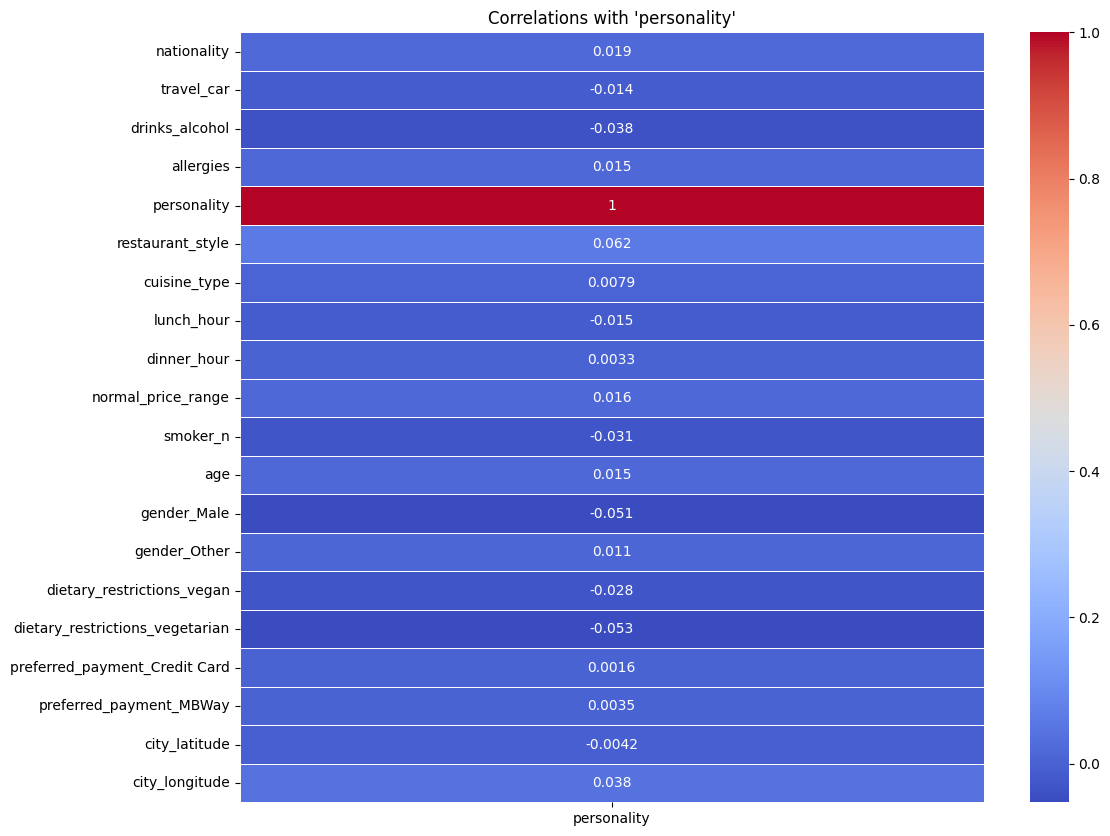

In [151]:
# Assuming 'df' is your DataFrame with all the numeric features
correlation_matrix = clients_data.corr()


# Calculate the correlations of all features with the target 'personality'
correlations_with_target = correlation_matrix['personality']

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add plot title
plt.title("Correlations with 'personality'")

# Show the plot
plt.show()

In [128]:
X = clients_data.drop(['personality', 'nationality'], axis=1)
y = clients_data['personality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Train the model

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


#Train the model
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

#Make predictions on the test data
y_pred = model.predict(X_test)




accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)




Accuracy: 0.14358974358974358
Classification Report:
               precision    recall  f1-score   support

 adventurous       0.11      0.15      0.13        34
     comfort       0.17      0.16      0.17        37
      foodie       0.12      0.10      0.11        41
     mindful       0.16      0.16      0.16        43
      social       0.15      0.15      0.15        40

    accuracy                           0.14       195
   macro avg       0.14      0.14      0.14       195
weighted avg       0.14      0.14      0.14       195

